In [1]:
import structuralcodes as sc
import matplotlib.pyplot as plt
import numpy as np

# Materials


In [33]:
a = np.abs(-1.3)
type(a)

numpy.float64

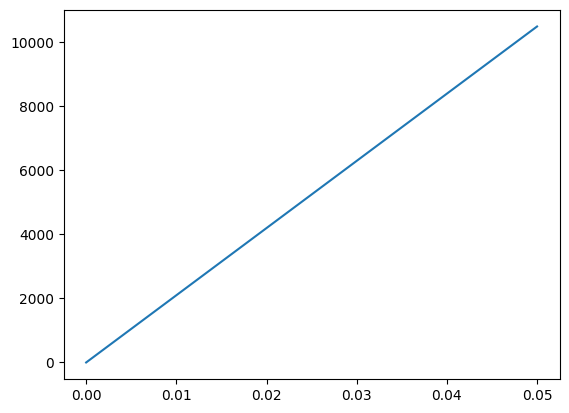

In [2]:
el = sc.materials.constitutive_laws.Elastic(210000)
strain = np.linspace(0,0.05,200)
stress = np.zeros_like(strain)
for i in range(len(strain)):
    stress[i] = el.get_stress(strain[i])

plt.plot(strain,stress)

In [26]:
%%timeit
el = sc.materials.constitutive_laws.Elastic(E = 210000)
strain = np.linspace(0,0.05,200)
stress = el.get_stress(strain)

27.5 µs ± 616 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [27]:
%%timeit
el = sc.materials.constitutive_laws.Elastic(210000)
strain = np.linspace(0,0.05,200)
stress = np.zeros_like(strain)
for i in range(len(strain)):
    stress[i] = el.get_stress(strain[i])

340 µs ± 7.78 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%%timeit
el = sc.materials.constitutive_laws.Elastic(210000)
strain = np.linspace(0,0.05,200)
stress = np.zeros_like(strain)
for i in range(len(strain)):
    stress[i] = el.get_stress(strain[i])

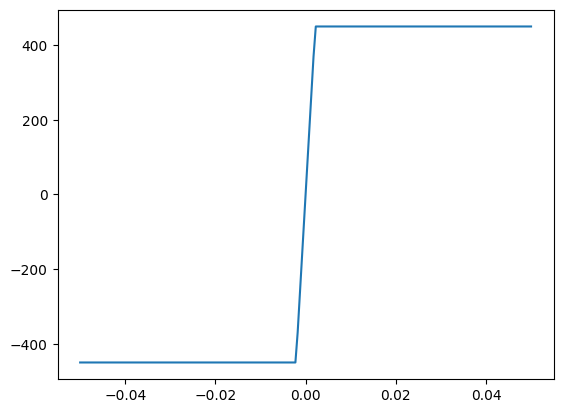

In [4]:
el_reinf = sc.materials.constitutive_laws.ElasticPlastic(210000,450, eps_su = 0.0675)
strain = np.linspace(-0.05,0.05,200)
stress = np.zeros_like(strain)
for i in range(len(strain)):
    stress[i] = el_reinf.get_stress(strain[i])

plt.plot(strain,stress)


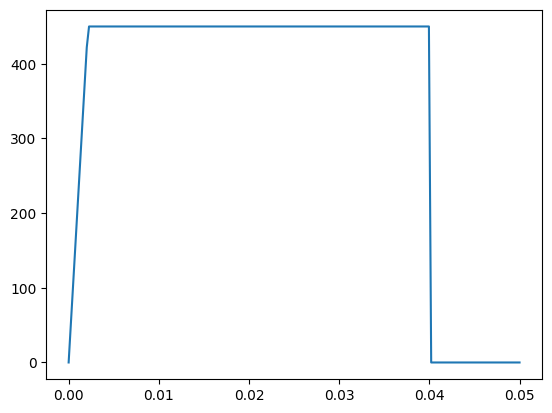

In [5]:
el = sc.materials.constitutive_laws.ElasticPlastic(210000,450,eps_su = 0.04)
strain = np.linspace(0,0.05,200)
stress = el.get_stress(strain)

plt.plot(strain,stress)

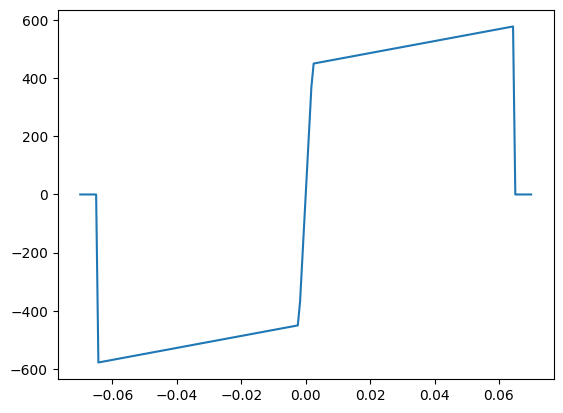

In [6]:
el = sc.materials.constitutive_laws.ElasticPlastic(210000,450, eps_su = 0.065, Eh = 2060)
strain = np.linspace(-0.07,0.07,200)
stress = el.get_stress(strain)

plt.plot(strain,stress)

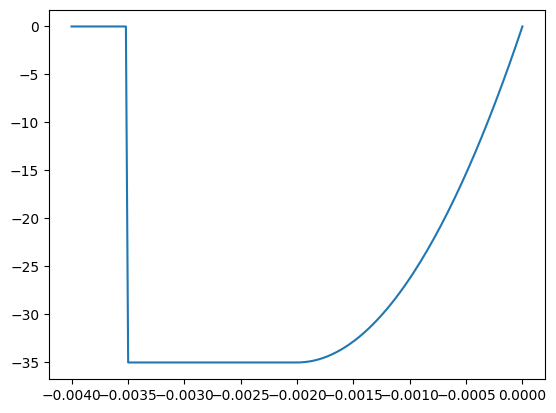

In [7]:
el = sc.materials.constitutive_laws.ParabolaRectangle(fc=-35)
strain = np.linspace(0,-0.004,200)
stress = np.zeros_like(strain)
for i in range(len(strain)):
    stress[i] = el.get_stress(strain[i])

plt.plot(strain,stress)

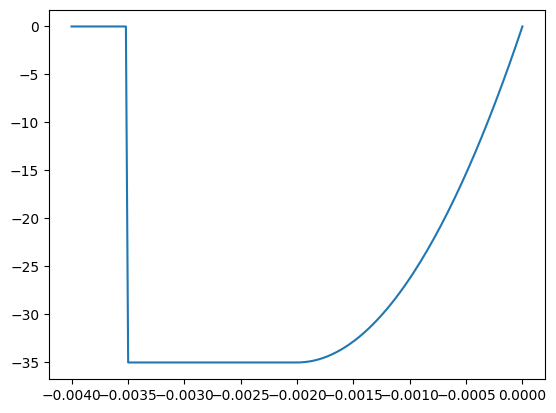

In [8]:
el = sc.materials.constitutive_laws.ParabolaRectangle(fc=-35)
strain = np.linspace(0,-0.004,200)
plt.plot(strain,el.get_stress(strain))

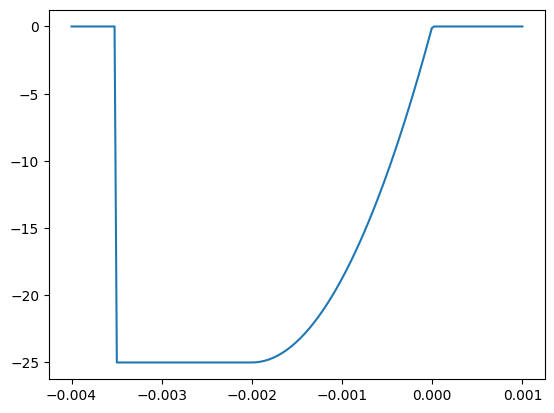

In [9]:
sc.set_design_code('mc2010')
C25 = sc.materials.concrete.create_concrete(25,'C25')

strain = np.linspace(0.001,-0.004,200)

plt.plot(strain,C25.stress_strain.get_stress(strain))


# Section

In [10]:
import structuralcodes.sections._rectangularRC as sec
sd = sec.StirrupsData(diameter=8, spacing= 150)
print(sd)
print(sd.ctg_alfa, sd.sin_alfa)


sd = sec.StirrupsData(diameter=8, spacing= 150, alfa = 45)
print(sd)
print(sd.ctg_alfa, sd.sin_alfa)

StirrupsData(diameter=8, spacing=150, number_legs_x=2, number_legs_y=2, alfa=1.5707963267948966)
6.123233995736766e-17 1.0
StirrupsData(diameter=8, spacing=150, number_legs_x=2, number_legs_y=2, alfa=0.7853981633974483)
1.0 0.7071067811865476


c:\Users\dtalledo\source\repos\structuralcodes\structuralcodes\sections\_rectangularRC.py:42: UserWarning: StirrupsData: alfa should be given in radians. Since the value alfa=45 has been provided it is assumed that is given in degrees.Converted to 0.79 radians.
  + f"Converted to {radians:.2f} radians."


In [11]:
# The section will have 3fi16 in the top part and 4fi16 in the bottom part:
rd = sec.ReinforcementData(diameter_corner = 16, number_bottom = 2, number_top = 1)
print(rd)

ReinforcementData(diameter_corner=16, diameter_bottom=16, number_bottom=2, diameter_top=16, number_top=1, diameter_left=16, number_left=0, diameter_right=16, number_right=0)


In [12]:
section = sec.RectangularRC(width = 300, height=500, cover=20, stirrups_data=sd, reinforcement_data=rd, concrete=C25, reinforcement=el_reinf)
print(section.area)
#print(section.xs,section.ys,section.d,section.As)
#print(section.xc,section.yc,section.Ac)

150000


In [13]:
print(f'Nmax = {section.max_tension_force()/1000:.1f} kN')
print(f'Nmax = {section.max_compression_force()/1000:.1f} kN')
print(f'Ac = {section.area} mm2')

Nmax = 633.3 kN
Nmax = -3633.3 kN
Ac = 150000 mm2


In [14]:
print(f'Mrd = {abs(section.bending_strength_xn(N = -10000))/1e6:.2f} kN')

Mrd = 161.69 kN


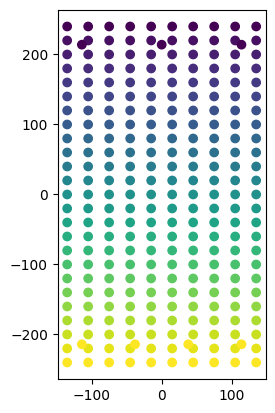

In [15]:
import matplotlib.pyplot as plt

plt.scatter(section.xc, section.yc, c = section.strain_c)
plt.scatter(section.xs, section.ys, c = section.strain_s)
plt.gca().set_aspect('equal')

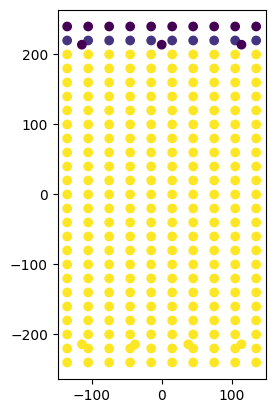

In [16]:
plt.scatter(section.xc, section.yc, c = section.stress_c)
plt.scatter(section.xs, section.ys, c = section.stress_s)
plt.gca().set_aspect('equal')

In [18]:
%%timeit -r 10 -n 1000
sec.RectangularRC(width = 300, height=500, cover=20, stirrups_data=sd, reinforcement_data=rd, concrete=C25, reinforcement=el_reinf).bending_strength_xn(N = -10000)

967 µs ± 19.4 µs per loop (mean ± std. dev. of 10 runs, 1000 loops each)


In [1]:
import numpy as np
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.collections import PatchCollection


# Plots a Polygon to pyplot `ax`
def plot_polygon(ax, poly, **kwargs):
    path = Path.make_compound_path(
        Path(np.asarray(poly.exterior.coords)[:, :2]),
        *[Path(np.asarray(ring.coords)[:, :2]) for ring in poly.interiors])

    patch = PathPatch(path, **kwargs)
    collection = PatchCollection([patch], **kwargs)

    ax.add_collection(collection, autolim=True)
    ax.autoscale_view()
    return collection

Above line
	 LINEARRING (-100 49.28203230275508, -100 100, 100 100, 100 -66.18802153517004, 50 -37.32050807568877, 50 50, -50 50, -50 20.414518843273793, -100 49.28203230275508) 14645.299461620749
	Interiors:
		 LINEARRING (-30 70, 30 70, 30 90, -30 90, -30 70)
Below line
	 LINEARRING (100 -66.18802153517004, 100 -100, -100 -100, -100 49.28203230275508, -50 20.414518843273793, -50 -50, 50 -50, 50 -37.32050807568877, 100 -66.18802153517004)
	Interiors:


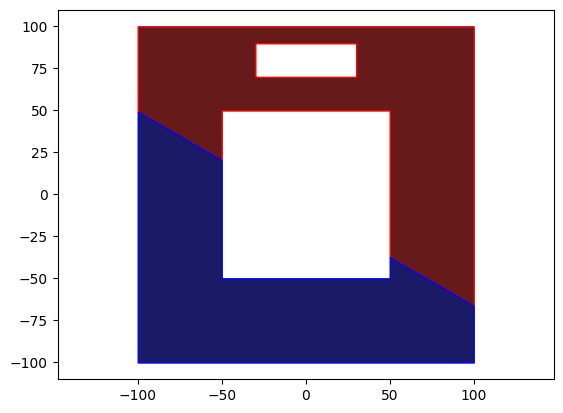

In [62]:
import structuralcodes.sections._generic as gs
from structuralcodes.materials.concrete import ConcreteMC2010
from shapely import Polygon
import matplotlib.pyplot as plt

poly = Polygon(shell=[(-100,-100),(100,-100),(100,100),(-100,100)],holes=[[(-50,-50),(-50,50),(50,50),(50,-50)],[(-30,70),(-30,90),(30,90),(30,70)]])
mat = ConcreteMC2010(fck=45)

geom = gs.SurfaceGeometry(poly,mat)

fig,ax = plt.subplots()
plot_polygon(ax, geom.polygon)
ax.axis('equal')

ab,bl = geom.split((20,-20),-np.pi/6)

print('Above line')
from shapely.geometry.polygon import orient
for a in ab:
    # print(list(a.exterior.coords))
    print('\t',orient(a,1).exterior, orient(a,1).area)
    print('\tInteriors:')
    for i in a.interiors:
        print('\t\t',i)
    plot_polygon(ax,a,facecolor=(0.4,0.1,0.1), edgecolor='r')
print('Below line')
for b in bl:
    print('\t',b.exterior)
    print('\tInteriors:')
    for i in b.interiors:
        print('\t\t',i)
    plot_polygon(ax,b,facecolor=(0.1,0.1,0.4), edgecolor='b')